В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Масштабування пікселів

In [9]:
# Створення згорткової нейронної мережі
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# Компіляція та навчання моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 31s 33ms/step - loss: 0.2654 - accuracy: 0.9035 - val_loss: 0.2958 - val_accuracy: 0.8890
Epoch 2/10
938/938 [==============================] - 31s 33ms/step - loss: 0.2314 - accuracy: 0.9156 - val_loss: 0.2528 - val_accuracy: 0.9051
Epoch 3/10
938/938 [==============================] - 35s 38ms/step - loss: 0.2084 - accuracy: 0.9233 - val_loss: 0.2592 - val_accuracy: 0.9067
Epoch 4/10
938/938 [==============================] - 37s 39ms/step - loss: 0.1859 - accuracy: 0.9304 - val_loss: 0.2417 - val_accuracy: 0.9159
Epoch 5/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1665 - accuracy: 0.9383 - val_loss: 0.2486 - val_accuracy: 0.9106
Epoch 6/10
938/938 [==============================] - 31s 33ms/step - loss: 0.1479 - accuracy: 0.9451 - val_loss: 0.2680 - val_accuracy: 0.9078
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1358 - accuracy: 0.9486 - val_loss: 0.2476 - val_accuracy:

In [12]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точність на тестових даних: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.2984 - accuracy: 0.9126
Точність на тестових даних: 0.9125999808311462


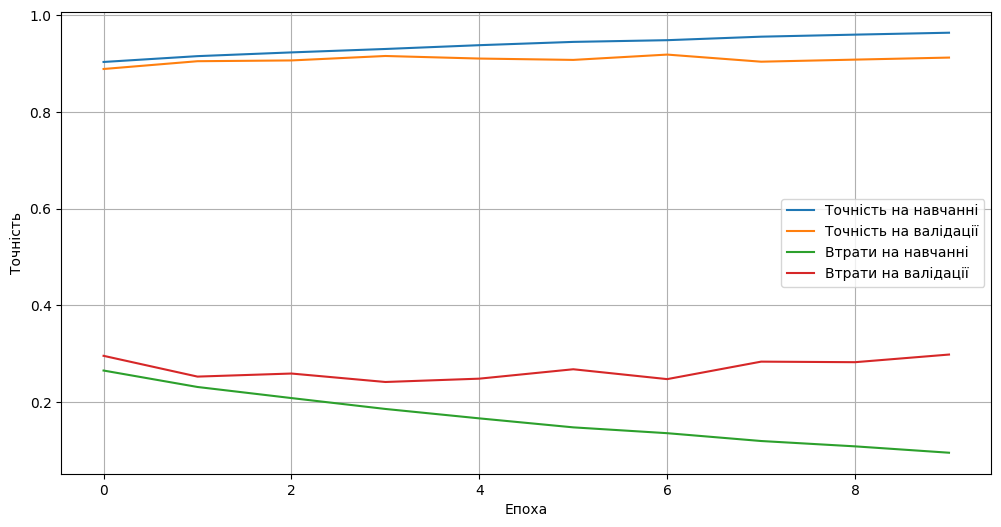

In [29]:
# Виведення графіків
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Точність на навчанні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.plot(history.history['loss'], label='Втрати на навчанні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.grid(True)
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='right')
plt.show()

In [61]:
import random

# Вибір випадкових зображень з тестового набору даних
num_samples = 10
random_indices = [random.randint(0, len(x_test) - 1) for _ in range(num_samples)]
sample_images = [x_test[i] for i in random_indices]
sample_labels = [y_test[i] for i in random_indices]

# Передбачення для випадкових зображень
predictions = model.predict(np.array(sample_images))

# Перетворення передбачень на назви класів
class_names = ["Футболка", "Штаны", "Світшот", "Сукня", "Пальто", "Босоніжки", "Сорочка", "Кросівки", "Сумка", "ботильйони"]
predicted_labels = [class_names[np.argmax(prediction)] for prediction in predictions]

1/1 [==============================] - 0s 186ms/step


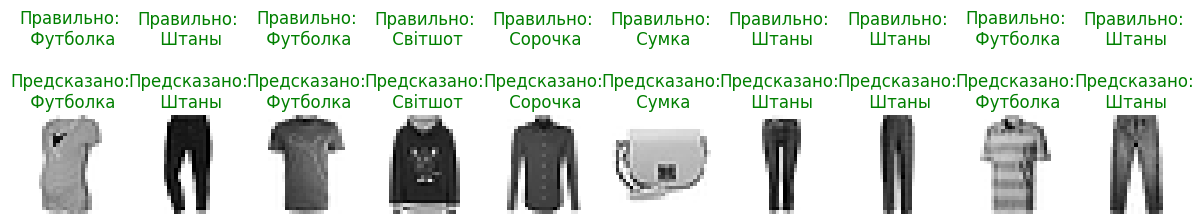

In [62]:
# Виведення зображень та передбачень
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap=plt.cm.binary)
    plt.title(f'Правильно:\n {class_names[sample_labels[i]]}\n\nПредсказано:\n {predicted_labels[i]}', color=('green' if predicted_labels[i] == class_names[sample_labels[i]] else 'red'))
    plt.axis('off')
plt.show()

Порівняймо дві моделі, згорткову нейронну мережу (Convolutional Neural Network - CNN) і багатошарову нейронну мережу (Fully Connected Neural Network), та зробимо висновки:

### Convolutional Neural Network (CNN):

Точність моделі після 10 епох навчання на тестових даних становить приблизно 96%, що є дуже високим показником.
Великий розрив між навчанням і валідацією (близько 96.4% на навчальних і 91.26% на тестових) може свідчити про перенавчання, але ця модель все одно демонструє високу точність.

### Fully Connected Neural Network:

Точність моделі після 20 епох навчання на тестових даних складає близько 93.49%.
Точність на валідаційних даних досягла близько 89.75% на останній епохі.

### Висновки:

CNN показала собою кращі результати у класифікації зображень одягу порівняно з багатошаровою мережею.
Основним фактором, який може покращити точність моделі CNN, є управління перенавчанням, наприклад, використання регуляризації моделі або збільшення кількості даних для навчання.
Модель CNN здатна робити класифікацію зображень одягу на дуже високому рівні точності, що робить її відмінним вибором для подібних завдань.